In [161]:
import pandas as pd
from pathlib import Path
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbors
from sklearn import svm  # for Support Vector Machine (SVM) Algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier # for using Decision Tree Algorithm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

In [162]:
iris_df = pd.read_csv(Path('../data/Iris.csv'))

**attributes -->** An attribute is a property of an instance that may be used to determine its classification. In the following dataset, the attributes are the petal and sepal length and width. It is also known as Features.

**Target variable -->** in the machine learning context is the variable that is or should be the output. Here the target variables are the 3 flower species.

### Models

In [163]:
def build_model(drop_columns=[]):
    model = iris_df.copy()
    model = model.drop(columns=drop_columns, axis= 1)
    return model

def train_model(df):
    X_train = df.drop(columns=['Species'], axis=1)
    Y_train = df['Species']
    models = []
    models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('DTC', DecisionTreeClassifier()))
    models.append(('SVM', svm.SVC(gamma='auto')))

    results = []
    names = []

    for name, model in models:
        kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        print(f'{name}\tMean: {round(cv_results.mean(),4)}\tSTD: {round(cv_results.std(),4)}')

    plt.boxplot(results, labels=names)
    plt.title('Algorithm Comparison')
    plt.show()

**Observation--->**

*   Support Vector Machine is the most accurate for each combination of features
*   Petal Features are more accurate then Sepal Features


All Features
LR	Mean: 0.92	STD: 0.0653
KNN	Mean: 0.9933	STD: 0.02
DTC	Mean: 0.9933	STD: 0.02
SVM	Mean: 1.0	STD: 0.0


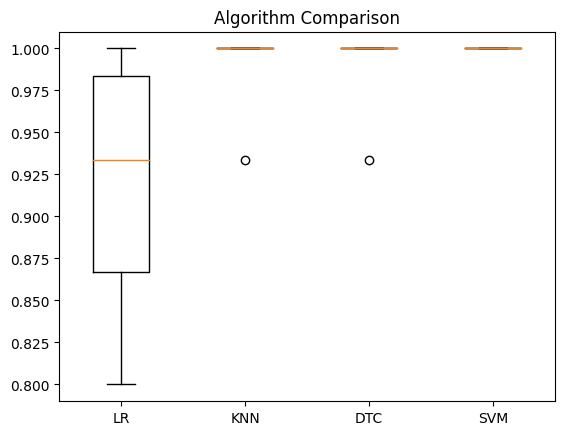


Petal Features
LR	Mean: 0.88	STD: 0.0653
KNN	Mean: 0.9933	STD: 0.02
DTC	Mean: 0.9933	STD: 0.02
SVM	Mean: 1.0	STD: 0.0


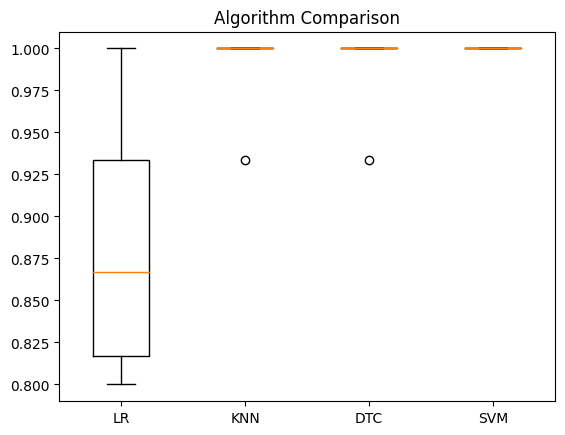


Sepal Features
LR	Mean: 0.8867	STD: 0.0733
KNN	Mean: 0.9933	STD: 0.02
DTC	Mean: 0.9867	STD: 0.04
SVM	Mean: 1.0	STD: 0.0


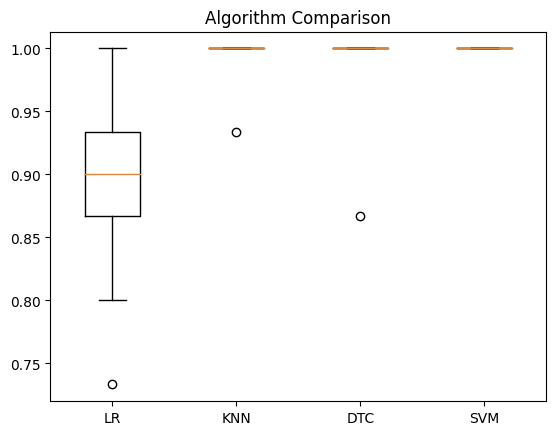

In [164]:
# Using all Features
print('\nAll Features')
df = build_model()
train_model(df)

# Using Petal Features
print('\nPetal Features')
df = build_model(['SepalLengthCm','SepalWidthCm'])
train_model(df)

# Using Sepal Features
print('\nSepal Features')
df = build_model(['PetalLengthCm','PetalWidthCm'])
train_model(df)

### K-Nearest Neighbors

In [165]:
def knn_find_best(drop_columns=[]):
    df = iris_df.copy()
    df = df.drop(columns=drop_columns,axis=1)
    X_train = df.drop(columns=['Species'], axis=1)
    Y_train = df['Species']
    results = []
    N = 0
    N_mean = 0
    for n in range(1,11):
        model = KNeighborsClassifier(n_neighbors=n)
        kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        results.append(cv_results.mean())
        print(f'KNN n{n}\tMean: {round(cv_results.mean(),4)}\tSTD: {round(cv_results.std(),4)}')
        if cv_results.mean() > N_mean:
            N_mean = cv_results.mean()
            N = n
    print(f'Highest Accurate n = {N}')
    print(f'Average: {round(sum(results)/len(results),4)}')
    plt.plot(range(1,11),results)
    plt.xticks(range(1,11))
    plt.show()

**Observation--->**

*   Including All Features is as accurate as Petal Features 
*   Sepal Features is less accurate than Petal Features


All Features
KNN n1	Mean: 1.0	STD: 0.0
KNN n2	Mean: 1.0	STD: 0.0
KNN n3	Mean: 0.9933	STD: 0.02
KNN n4	Mean: 1.0	STD: 0.0
KNN n5	Mean: 0.9933	STD: 0.02
KNN n6	Mean: 1.0	STD: 0.0
KNN n7	Mean: 0.9933	STD: 0.02
KNN n8	Mean: 0.9867	STD: 0.0267
KNN n9	Mean: 1.0	STD: 0.0
KNN n10	Mean: 0.9867	STD: 0.0267
Highest Accurate n = 1
Average: 0.9953


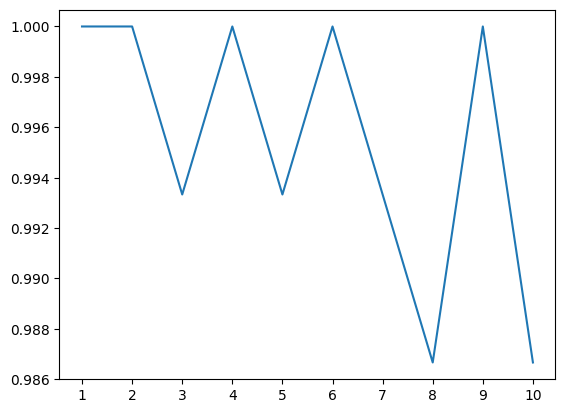


Petal Features
KNN n1	Mean: 1.0	STD: 0.0
KNN n2	Mean: 1.0	STD: 0.0
KNN n3	Mean: 0.9933	STD: 0.02
KNN n4	Mean: 1.0	STD: 0.0
KNN n5	Mean: 0.9933	STD: 0.02
KNN n6	Mean: 0.9933	STD: 0.02
KNN n7	Mean: 0.9933	STD: 0.02
KNN n8	Mean: 0.9933	STD: 0.02
KNN n9	Mean: 1.0	STD: 0.0
KNN n10	Mean: 0.9867	STD: 0.0267
Highest Accurate n = 1
Average: 0.9953


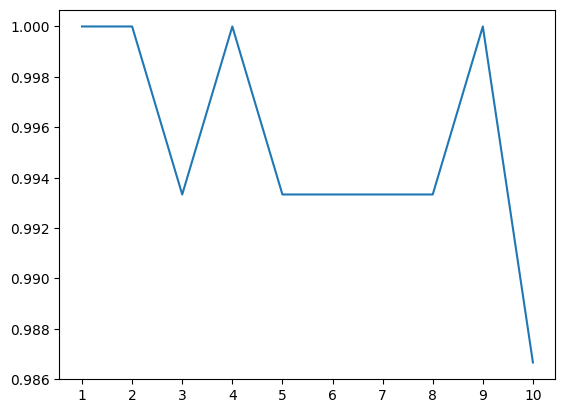


Sepal Features
KNN n1	Mean: 0.9933	STD: 0.02
KNN n2	Mean: 0.9933	STD: 0.02
KNN n3	Mean: 0.9933	STD: 0.02
KNN n4	Mean: 0.9867	STD: 0.04
KNN n5	Mean: 0.9933	STD: 0.02
KNN n6	Mean: 0.9867	STD: 0.04
KNN n7	Mean: 0.9933	STD: 0.02
KNN n8	Mean: 0.98	STD: 0.0427
KNN n9	Mean: 0.9933	STD: 0.02
KNN n10	Mean: 0.98	STD: 0.0427
Highest Accurate n = 1
Average: 0.9893


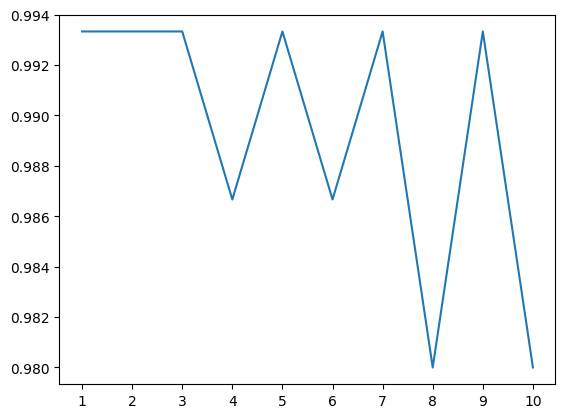

In [166]:
print(f'\nAll Features')
n = knn_find_best()

print(f'\nPetal Features')
n = knn_find_best(['SepalLengthCm','SepalWidthCm'])

print(f'\nSepal Features')
n = knn_find_best(['PetalLengthCm','PetalWidthCm'])